<font size="15">Group Project<font>
- Jashan Bains (47733738)
- Priyansh Bahri (89605810)
-
- 

<font size= "5">Introduction:<font>

<font size= "5">Methods and Results:<font>

<font size= "3.5">Description<font>

here

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Joining with `by = join_by(hashedEmail)`


name,average_total_playtime,average_total_age
<chr>,<dbl>,<dbl>
Aarav,0.2,17
Aaron,1.2,17
Adrian,0.0,17
Ahmed,0.2,NaN
Aiden,1.4,25
Akio,218.1,20
Akira,0.0,28
Alaric,0.0,17
Alex,53.9,17


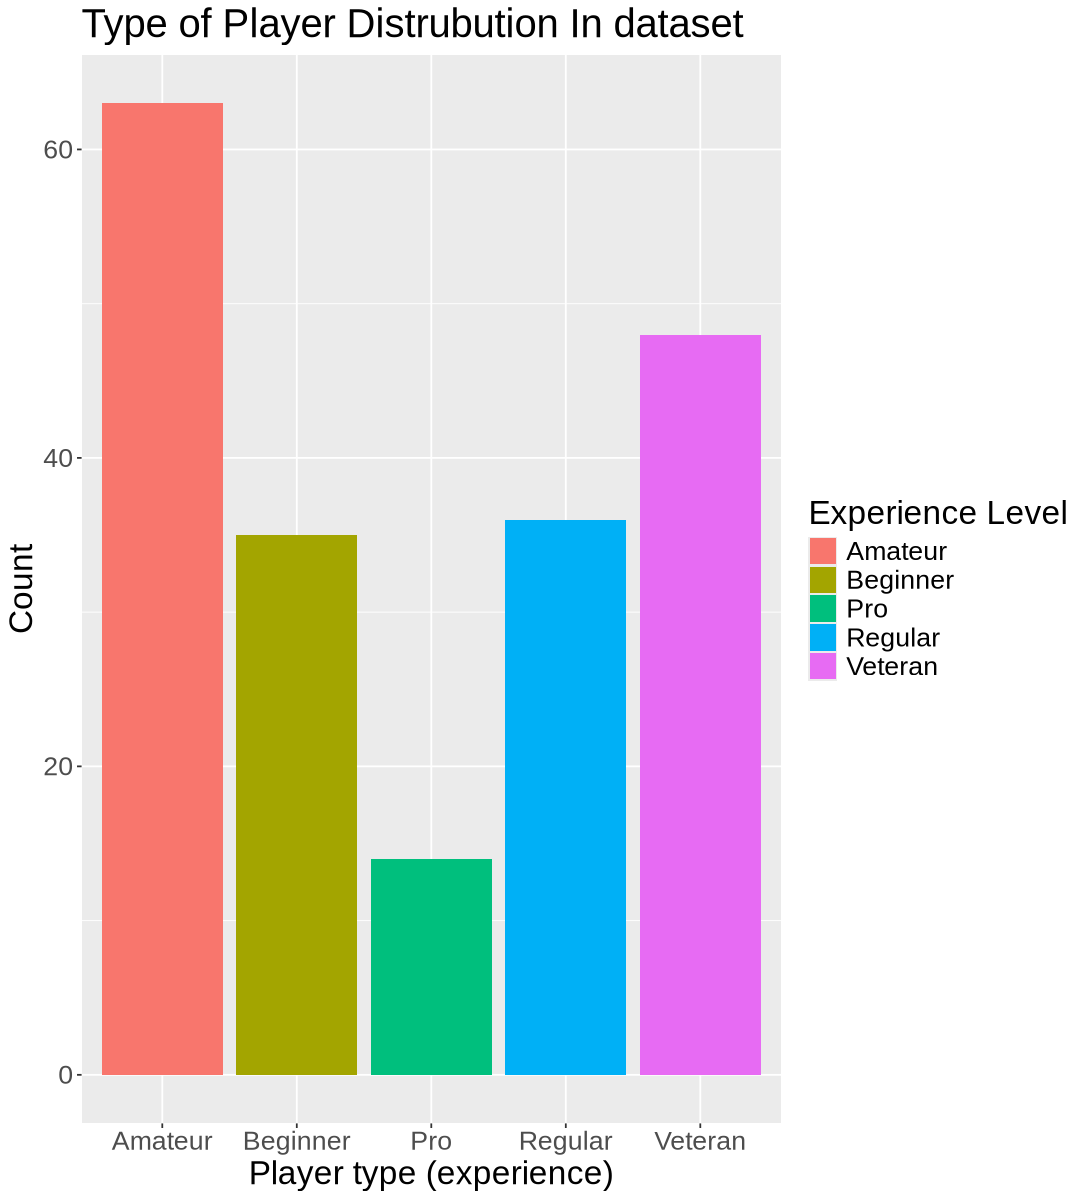

→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 256 rows.
               ✖ Assigned data has 257 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 257 to size 256.

There were issues with some computations   A: x1

There were issues with some computations   A: x2





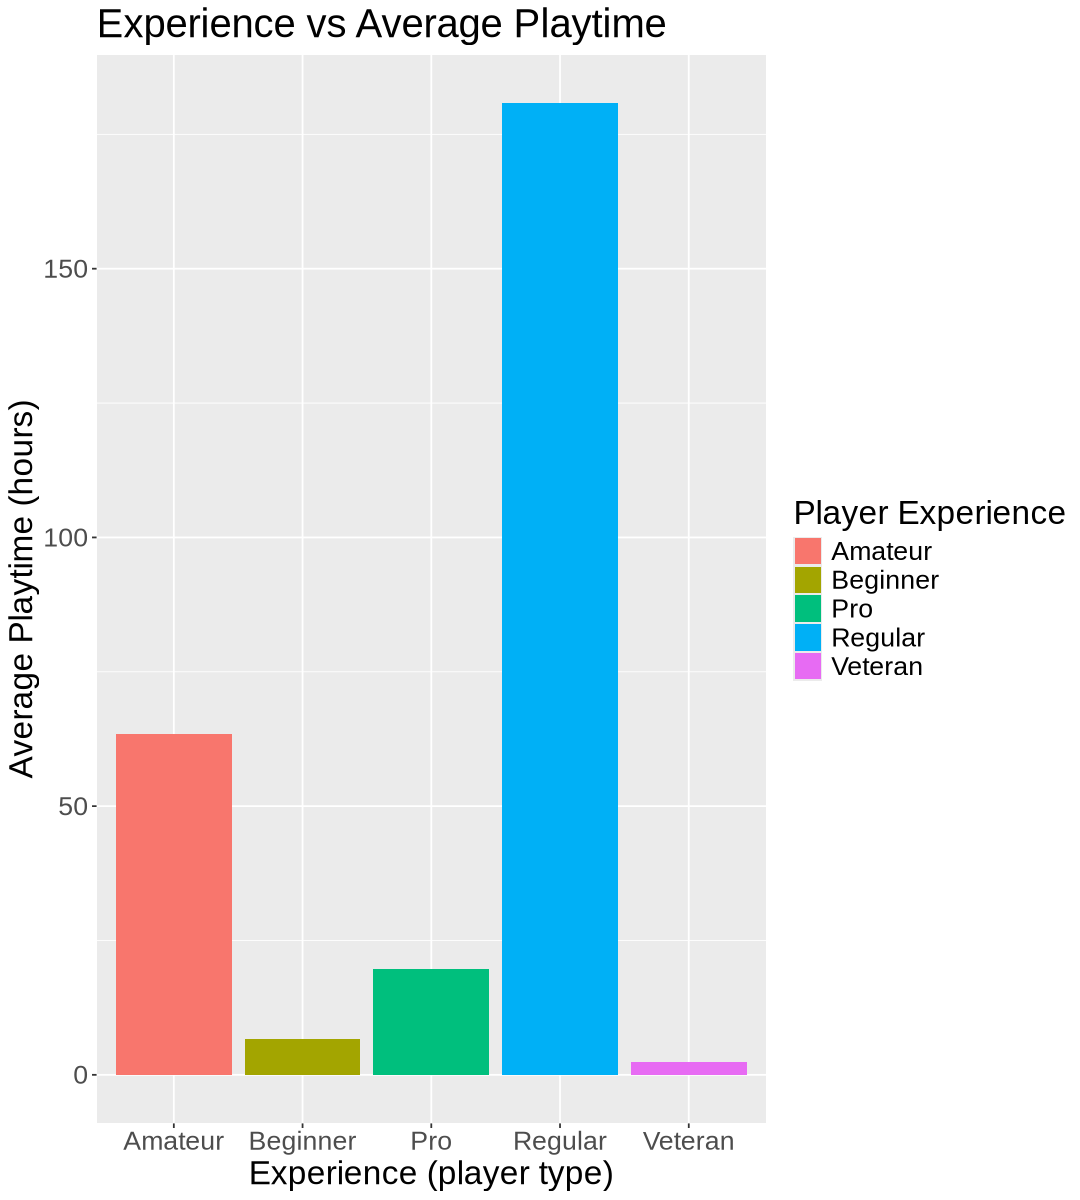

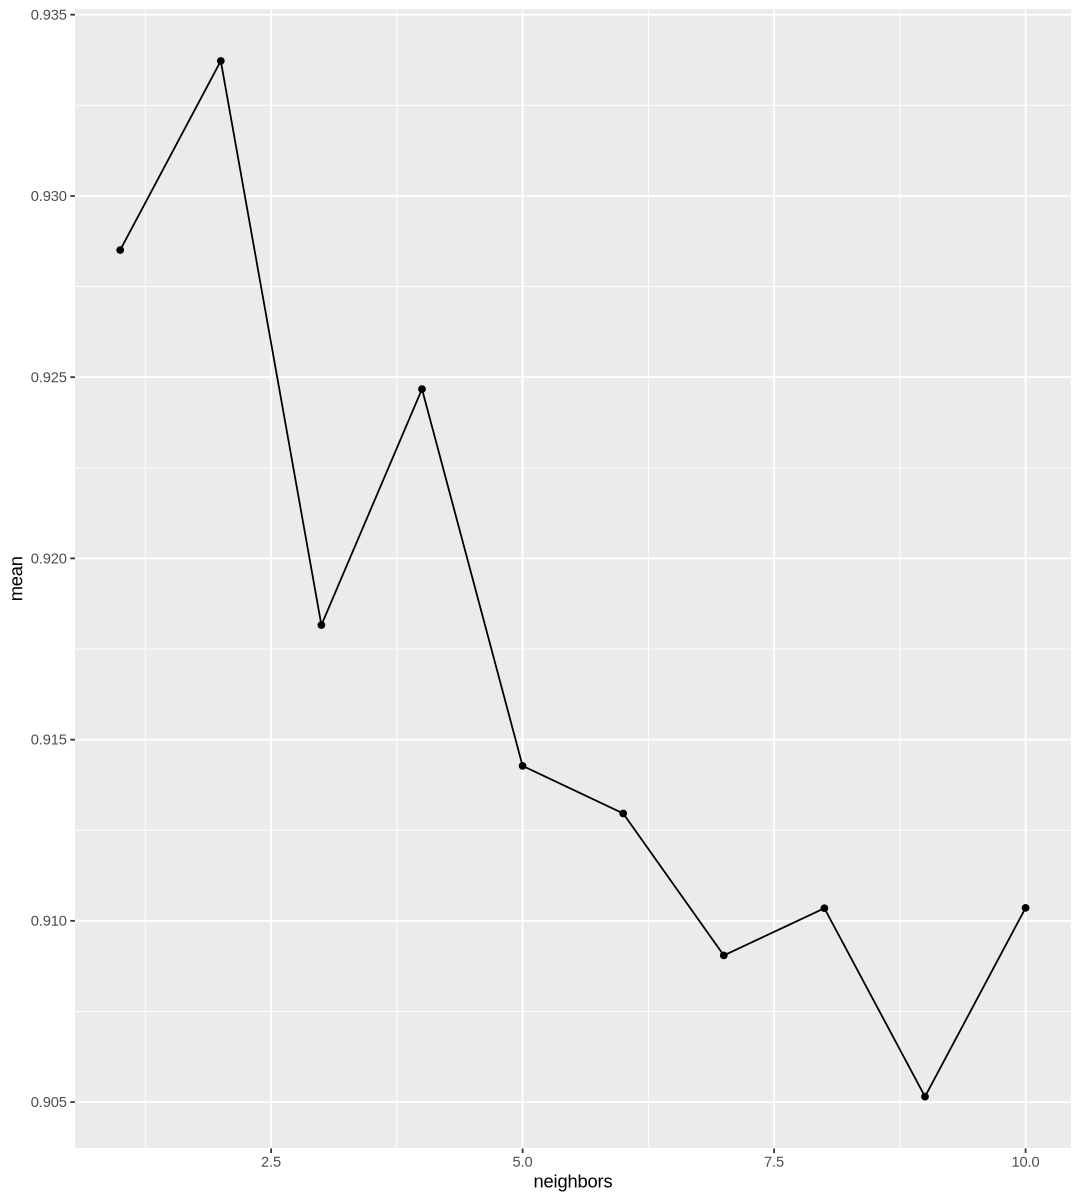

In [27]:
#loading in the needed libraries
library(tidyverse)
library(readr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)
library(repr)
library(tidymodels)


#loading in the raw data
players_data <- read_csv ("https://raw.githubusercontent.com/jashanbains-24/DSCI-100-Group-Project/refs/heads/main/players.csv")
sessions_data <- read_csv("https://raw.githubusercontent.com/jashanbains-24/DSCI-100-Group-Project/refs/heads/main/sessions.csv")

#merging the two datasets with left_join which also grouped by hashedEmail
minecraft_data <- left_join(players_data,sessions_data)


#getting rid of not needed columns (unix time representation)
minecraft_data <- minecraft_data|>
                    select(-original_start_time,-original_end_time)



#tidying the start/end_time columns
minecraft_data <- minecraft_data|>
                    separate(start_time,into=c("start_date","start_time"),sep=" ")|>
                    separate(end_time,into=c("end_date","end_time"),sep=" ")|>
                    group_by(name)


#average playtime and age
playtime_mean <-  minecraft_data|>
                    summarize(average_total_playtime=mean(played_hours,na.rm=TRUE),
                             average_total_age=mean(Age, na.rm=TRUE))

playtime_mean


options(repr.plot.width=9,repr.plot.height=10)
#visualizing the distribution of player types in the dataset
player_type_viz <- players_data|>
                    group_by(hashedEmail)|>
                    ggplot(aes(x = experience, fill = experience))+
                    geom_bar()+
                    labs(title="Type of Player Distrubution In dataset",
                         y="Count",
                         x="Player type (experience)",
                        fill="Experience Level")+
                        theme(text=element_text(size=20))


player_type_viz

#visualizing the relationship betwewen player type and hours played
experienceplaytime <- minecraft_data|>
                        group_by(experience)|>
                        summarize(avg_playtime=mean(played_hours,na.rm=TRUE))|>
                        ggplot(aes(x=experience,y=avg_playtime,fill=experience))+
                        geom_bar(stat="identity")+
                        labs(x="Experience (player type)",
                             y="Average Playtime (hours)",
                             title="Experience vs Average Playtime",
                             fill="Player Experience")+
                        theme(text=element_text(size=20))

experienceplaytime


# Performing Knn Classification for Data Analysis
set.seed(3456) # Don't change

# splitting the data into training and testing
minecraft_split <- initial_split(minecraft_data, prop = 0.8, strata = experience)
minecraft_training <- training(minecraft_split)
minecraft_testing <- testing(minecraft_split)

# creating the recipe
minecraft_recipe <- recipe(experience ~ Age + played_hours, data = minecraft_training) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

# creating knn classification model
minecraft_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")

# 5-fold cross validation
minecraft_vfold <- vfold_cv(minecraft_training, v = 5, strata = experience)

# k values tibble for tuning
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# workflow
knn_results <- workflow() |>
                add_recipe(minecraft_recipe) |>
                add_model(minecraft_spec) |>
                tune_grid(resamples = minecraft_vfold, grid = k_vals) |>
                collect_metrics()

# filtering for accuracy
accuracies <- knn_results |>
                filter(.metric == "accuracy")

# accuracy visualization
accuracy_plot <- accuracies |>
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line() 
accuracy_plot

<font size= "5">Discussion:<font>